In [202]:
import torch 
import torch.nn as nn 
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt 

In [203]:
# y = m(x)  + c 

m = 0.6 
c = 14

#X = torch.randint(low=-100,high=100,size=(80,1))

X = torch.arange(start=-100,end=100,step=2).unsqueeze(dim=1)
X = X.float()

y = X*m + c


In [204]:
X.shape

torch.Size([100, 1])

In [205]:
X_train = X[:int(0.8*(len(X)))]
y_train = y[:int(0.8*(len(X)))]
X_test = X[int(0.8*(len(X))):]
y_test = y[int(0.8*(len(X))):]
len(X_test),len(y_train)

(20, 80)

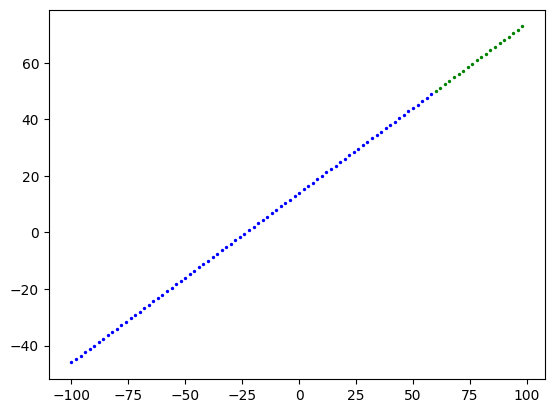

In [206]:
plt.scatter(X_train,y_train,s=2,c='b')
plt.scatter(X_test,y_test,s=2,c='g')
# plt.plot([-100,100],[0,0],c='black')
# plt.plot([0,0],[y.max(),y.min()],c='black')

plt.show()

In [207]:
class Model(nn.Module):
    """Some Information about MyModule"""
    def __init__(self):
        super(Model, self).__init__()
        self.LinearLayer = nn.Linear(in_features=1,out_features=1)

    def forward(self, x:torch.Tensor)->torch.Tensor:
        out = self.LinearLayer(x)

        return out 

In [208]:
torch.manual_seed(42)

model = Model()
model,model.state_dict()

(Model(
   (LinearLayer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('LinearLayer.weight', tensor([[0.7645]])),
              ('LinearLayer.bias', tensor([0.8300]))]))

In [209]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.01)

In [210]:
X_train.shape

torch.Size([80, 1])

In [211]:
torch.manual_seed(42)

epochs = 500

for epoch in range(epochs+1):
    y_preds = model(X_train)
    loss = loss_fn(y_preds,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test)

        test_loss = loss_fn(test_pred,y_test)

        if epoch % 10 == 0:
            print(f"epoch :{epoch } | loss : {loss} | test loss : {test_loss}")

epoch :0 | loss : 16.62529945373535 | test loss : 16.751447677612305
epoch :10 | loss : 11.179636001586914 | test loss : 12.847188949584961
epoch :20 | loss : 10.622865676879883 | test loss : 14.27418327331543
epoch :30 | loss : 10.920186996459961 | test loss : 13.134176254272461
epoch :40 | loss : 10.59786319732666 | test loss : 14.32416820526123
epoch :50 | loss : 10.582253456115723 | test loss : 13.14466667175293
epoch :60 | loss : 10.547221183776855 | test loss : 13.07091236114502
epoch :70 | loss : 10.512189865112305 | test loss : 12.997164726257324
epoch :80 | loss : 10.477158546447754 | test loss : 12.92341423034668
epoch :90 | loss : 10.442127227783203 | test loss : 12.849665641784668
epoch :100 | loss : 10.40735912322998 | test loss : 11.630661010742188
epoch :110 | loss : 9.950157165527344 | test loss : 14.676902770996094
epoch :120 | loss : 11.517024040222168 | test loss : 9.943641662597656
epoch :130 | loss : 9.87297248840332 | test loss : 13.266385078430176
epoch :140 | lo

In [212]:
with torch.inference_mode():
        test_pred_new = model(X_test)

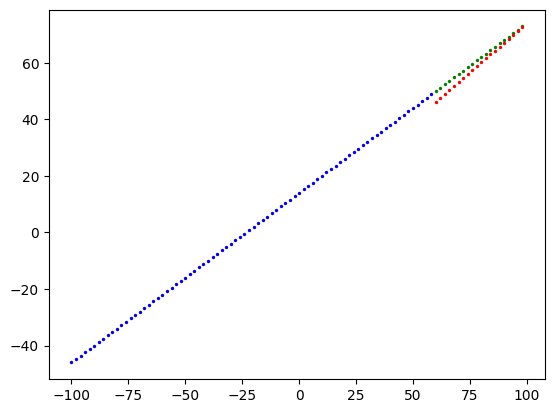

In [213]:
plt.scatter(X_train,y_train,s=2,c='b')
plt.scatter(X_test,y_test,s=2,c='g')
plt.scatter(X_test,test_pred_new,s=2,c='red')
# plt.plot([-100,100],[0,0],c='black')
# plt.plot([0,0],[y.max(),y.min()],c='black')

plt.show()